In [2]:
import pandas as pd
file = r'C:\Users\ambsc\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1\Titanic-Dataset.csv'

df = pd.read_csv(file)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("Rows (observations):", df.shape[0])
print("Columns (variables):", df.shape[1])


Rows (observations): 891
Columns (variables): 12


This code lists the number of vairbales and observations 

In [4]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical)
print("Categorical columns:", categorical)


Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


This code lists the numerical and categorical collumns in the data

In [5]:
print(df.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This code shows the NA values in the data

In [6]:
print(df['Survived'].value_counts())


Survived
0    549
1    342
Name: count, dtype: int64


This code shows how many people survived, 1 being survived, 0 being no

In [8]:
df[['Survived', 'Fare']].corr()


,Survived,Fare
Survived,1.000000,0.257307
Fare,0.257307,1.000000


This shows the relationship between survivability and passengers who paid higher fairs

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch']  
df['Alone'] = df['FamilySize'] == 0

df['Alone'].value_counts()


Alone
True     537
False    354
Name: count, dtype: int64

This shows how many people travelled alone vs with others

In [10]:
pd.crosstab(df['Alone'], df['Survived'], normalize='index')


Survived,0,1
Alone,,
False,0.494350,0.505650
True,0.696462,0.303538


This shows if travelling with others affected survivability

In [11]:
df.groupby('Pclass')[['Fare', 'Age', 'Survived']].mean()


,Fare,Age,Survived
Pclass,,,
1,84.154687,38.233441,0.629630
2,20.662183,29.877630,0.472826
3,13.675550,25.140620,0.242363


This shows the relationship between class fare, class, age and survivabilty

In [12]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index')


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


This shows survivability based on gender

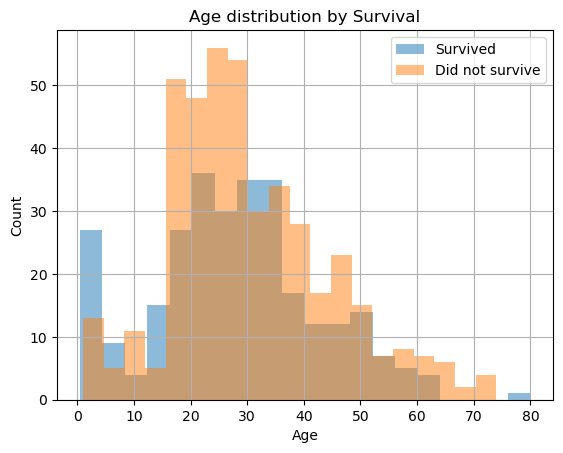

In [16]:
import matplotlib.pyplot as plt

df[df['Survived']==1]['Age'].hist(alpha=0.5, label='Survived', bins=20)
df[df['Survived']==0]['Age'].hist(alpha=0.5, label='Did not survive', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age distribution by Survival')
plt.show()


This shows age distribution and surivability 